# Project : Tmdb-movies Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>




<a id='intro'></a>
## **Introduction**


This dataset contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue. There are some certain characteristics for each data in the dataset which are :
<ul>
<li> genres </li>
<li> revenue </li>
<li> director </li>
<li> original_title </li>
<li> release_year </li>
<li> production_companies </li>

and likes.

</ul>
With this given dataset I will be exploring the below questions :

<ul>
<li>Which genres are most popular from year to year? </li>
<li>Who is the director with most number of movies? </li>
<li>What kind of properties are associated with the highest revenue?</li>
<li>Which year has the highest number of movies release? </li>
<li>Which production_companies is the most popular ?</li>
<li>What are the longest and shortest movies from year to year?</li>
<li>what are the most watch movies base on the runtime?is it the movies with the highest runtime or lowest? </li>
<li>Which director has the highest number of votes?</li>

</ul>



In [665]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## **Data Wrangling**

### General Properties

In [666]:
#load dataset

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [667]:
#check the shape of the dataframe
df.shape

(10866, 21)

In [668]:
#check theck the dataframe information to if there is missing data,duplicated datas and null data
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [669]:
#describe the data to see the statistical value of each column
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 
From the above information about the dataframe and from quick view of the dataframe , I notice that there are some columns with missing values ,while some have 0 or null value. I will be using this particular section to clean those data.
keywords,tagline,director,genres,production_companies have missing values. Since some column are not necessary in this dataframe and the are object(string) it will be a good idea to drop them if they are not up to 70% of the dataframe.

so am going to drop some columns like tagline,cast,budget_adj,revenue_adj and others, while i will replace the column with 0 values with mean of the column

In [670]:
#check for duplicate row
df.duplicated().sum()

1

In [671]:
#drop duplicates
df = df.drop_duplicates();


In [672]:
#drop unecessary columns
df.drop(['id','homepage','imdb_id','budget_adj','revenue_adj','cast','tagline'],axis=1,inplace=True)
#check if they are dropped
df.head()

,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [673]:
#check the info again 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   director              10821 non-null  object 
 5   keywords              9372 non-null   object 
 6   overview              10861 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.2+ MB


$$






$$

##### **Check if budget has a row with 0**

In [674]:
#check if there is rows where revenue value is 0
df.query('budget == 0').head(2)

,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
30,3.927333,0,29355203,Mr. Holmes,Bill Condon,london|detective|sherlock holmes,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015
36,3.358321,0,22354572,Solace,Afonso Poyart,thriller|serial killer|psychic|fbi agent|intrigue,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015


$$





$$
##### **replace all 0 in budget with the mean of the budget**

In [675]:
#replace all 0 in budget with the mean of the budget
df['budget'] = df['budget'].replace(0, df['budget'].mean())

#check if all 0 has been replace
df.query('budget == 0').head(2)

,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


$$









$$


##### **Check if runtime has a row with 0**

In [676]:
#check if there is rows where runtime value is 0
df.query('runtime == 0').head(2)

,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
92,1.876037,1.462429e+07,0,Mythica: The Necromancer,A. Todd Smith,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015
334,0.357654,1.462429e+07,0,Ronaldo,Anthony Wonke,biography|soccer player,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015


$$





$$
#### **replace all 0 in runtime with the mean of the runtime**

In [677]:
#fill all 0 runtime by mean
df['runtime'] = df['runtime'].replace(0, df['runtime'].mean())

#check if all 0 has been replace
df.query('budget == 0').head(2)

,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


$$









$$


#### **Check if revenue has a row with 0**

In [678]:
#check if there is rows where revenue value is 0
df.query('revenue == 0').head(2)

,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
48,2.932340,30000000.0,0,Wild Card,Simon West,gambling|bodyguard|remake,When a Las Vegas bodyguard with lethal skills ...,92.0,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015
67,2.331636,20000000.0,0,Survivor,James McTeigue,new year's eve|fire|showdown|terrorist|embassy,A Foreign Service Officer in London tries to p...,96.0,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015


$$





$$
#### **replace all 0 in revenue with the mean of the revenue**

In [679]:
#fill all 0 revenue by mean
df['revenue'] = df['revenue'].replace(0, df['revenue'].mean())

#check if all 0 has been replace
df.query('revenue == 0').head(2)

,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


#### **Drop all null value**

In [680]:
#drop all null value
df.dropna(inplace=True)
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8691 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            8691 non-null   float64
 1   budget                8691 non-null   float64
 2   revenue               8691 non-null   float64
 3   original_title        8691 non-null   object 
 4   director              8691 non-null   object 
 5   keywords              8691 non-null   object 
 6   overview              8691 non-null   object 
 7   runtime               8691 non-null   float64
 8   genres                8691 non-null   object 
 9   production_companies  8691 non-null   object 
 10  release_date          8691 non-null   object 
 11  vote_count            8691 non-null   int64  
 12  vote_average          8691 non-null   float64
 13  release_year          8691 non-null   int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 1018.5+ KB


<a id='eda'></a>
## **Exploratory Data Analysis**

#### **A general look on the data**

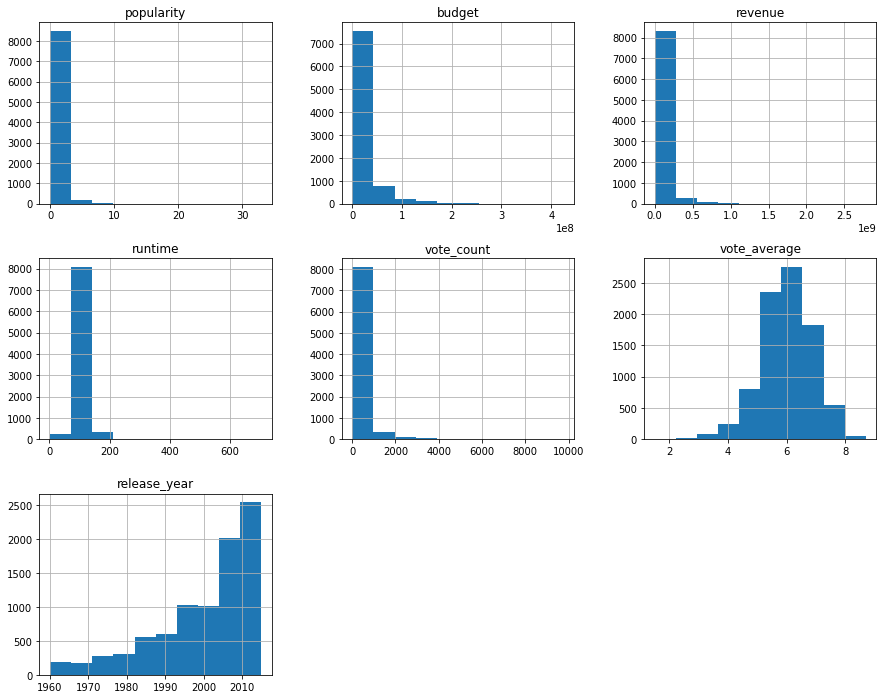

In [681]:
#plot quick histogram of all the columns
df.hist(figsize=(15,12));

<ul>
<li> Most movies have a high budget,popularity and revenue </li>
<li> release year from 2000 has a very high rate of movies released</li>
<li> The Average runtime of most movies is 100</li>
</ul>

#### **Q1 Which genre are most popular from year to year**

In [682]:
#check genres column
df['genres'].head(2)

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
Name: genres, dtype: object

In [683]:
#split genres column by the delimeter "|"
split_genres = df['genres'].str.get_dummies(sep="|")
#check the split array
split_genres.head(2)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [684]:
#re-check the column of the split genres
split_genres.columns

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [685]:
#find the sum of a specific column before plotting the sum of all column to know if it's accurate
split_genres['Action'].sum()

2022

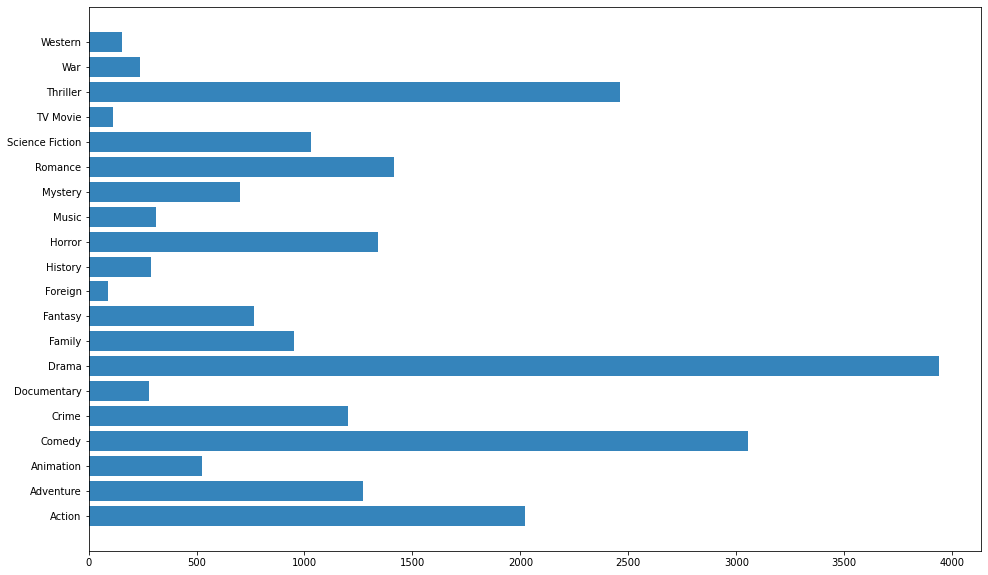

In [686]:
#plot horizontal bar chart of the split genres
plt.figure(figsize=(16,10))
plt.barh(split_genres.columns,split_genres.sum(),alpha=0.9)
plt.show();

##### **Drama is the most popular genres**

#### From the above graph it is clear that there are 5 most popular genres and they are listed below according to there rank

<ul> 
<li> Drama</li>
<li>Comedy</li>
<li>Thriller</li>
<li>Action</li>
<li>Romance</li>

</ul>

### **Q2 Who is the director with most number of movies**

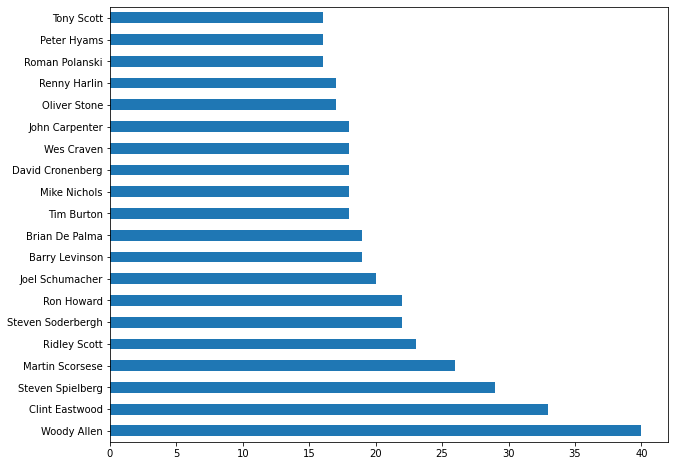

In [687]:
#plot graph of the total occurence of each director
df['director'].value_counts().head(20).plot(kind='barh',figsize=(10,8));

**The director with most number of movies**

In [688]:
#get the number of of movies directed by the Wooden Allen from the above graph
df.query('director == "Woody Allen"').director.count()

40

**Woody Allen direct the highest number of movies , he directed 40 movies in the given dataset**

### **Q3 What kinds of properties are associated with movies that have high revenues?**

In [689]:
#find the media of the revenue
revenue_median = df['revenue'].median()

In [690]:
#find the low revenue
low_revenue = df.query('revenue <= {}'.format(revenue_median))

In [691]:
#find the high revenue
high_revenue = df.query('revenue>{}'.format(revenue_median))

#### Function to find the mean of a specific column base on high revenue and low revenue

In [692]:
#Function find the mean of of a column base on high_revenue and low_revenue
def revenue_column_mean(column):
    high_revenue_column_mean = high_revenue[column].mean()
    low_revenue_column_mean = low_revenue[column].mean()
    
    return high_revenue_column_mean,low_revenue_column_mean

#### Function to plot a bar chart of high revenue and low revenue for a certain column

In [693]:
def plot_revenue(mean_high_revenue,mean_low_revenue,column):
    locations = [1, 2]
    heights = [mean_high_revenue,mean_low_revenue]
    labels = ['High', 'Low']
    plt.figure(figsize=(12,10))
    plt.bar(locations, heights, tick_label=labels,alpha=0.5,color =['orangered','blue'])
    plt.title('Associate of '+column+' on high and low revenue',fontsize=18)
    plt.xlabel('Revenue',fontsize=18)
    plt.ylabel(column,fontsize=18);
    

#### plot the popularity of both high revenue and low revenue to see if the popularity is associated with high revenue

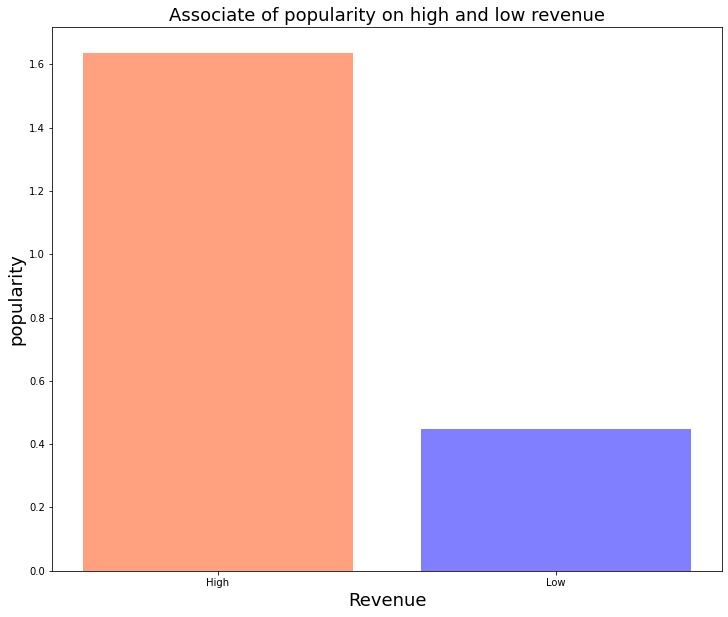

In [694]:
high_revenue_popularity_mean,low_revenue_popularity_mean = revenue_column_mean('popularity')
plot_revenue(high_revenue_popularity_mean,low_revenue_popularity_mean,'popularity')

#### plot the graph runtime of both high revenue and low revenue to see if the runtime is associated with high revenue

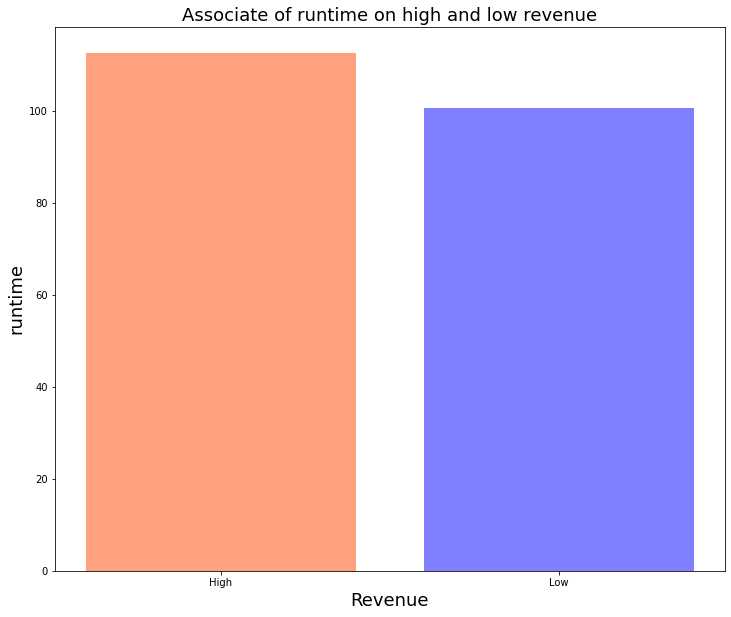

In [695]:
high_revenue_runtime_mean,low_revenue_runtime_mean = revenue_column_mean('runtime')
plot_revenue(high_revenue_runtime_mean,low_revenue_runtime_mean,'runtime')

#### plot the graph vote count of both high revenue and low revenue to see if the vote count is associated with high revenue

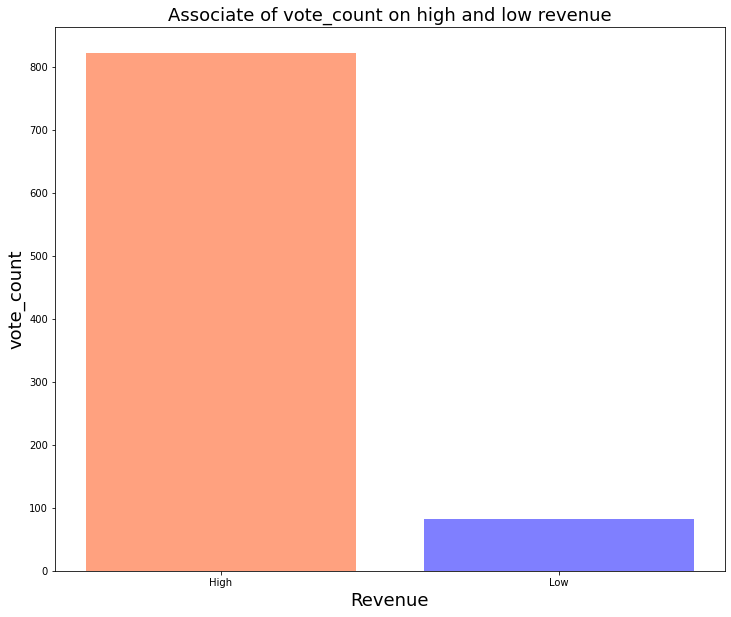

In [696]:
high_revenue_vote_count_mean,low_revenue_vote_count_mean = revenue_column_mean('vote_count')
plot_revenue(high_revenue_vote_count_mean,low_revenue_vote_count_mean,'vote_count')

#### plot the graph budget of both high revenue and low revenue to see if the budget is associated with high revenue

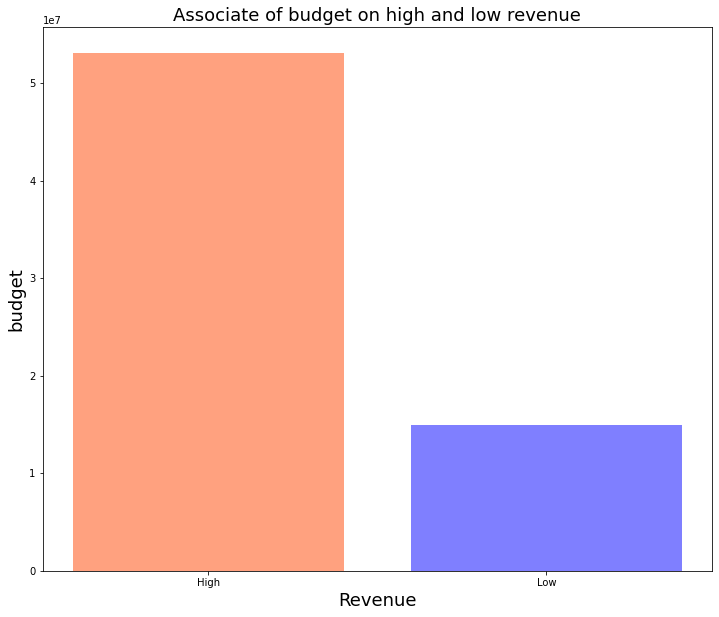

In [697]:
high_revenue_budget_mean,low_revenue_budget_mean = revenue_column_mean('budget')
plot_revenue(high_revenue_budget_mean,low_revenue_budget_mean,'budget')

#### plot the graph production companies of both high revenue and low revenue to see if the production companies is associated with high revenue

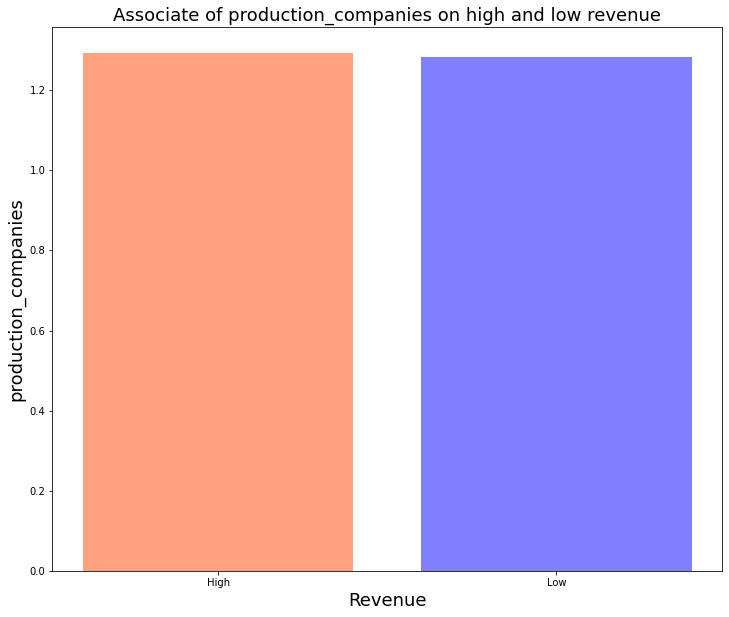

In [698]:
high_revenue_production_companies_mean,low_revenue_production_companies_mean =high_revenue['production_companies'].value_counts().mean(),low_revenue['production_companies'].value_counts().mean()
plot_revenue(high_revenue_production_companies_mean,low_revenue_production_companies_mean,'production_companies')

#### plot the graph genres of both high revenue and low revenue to see if the genres is associated with high revenue

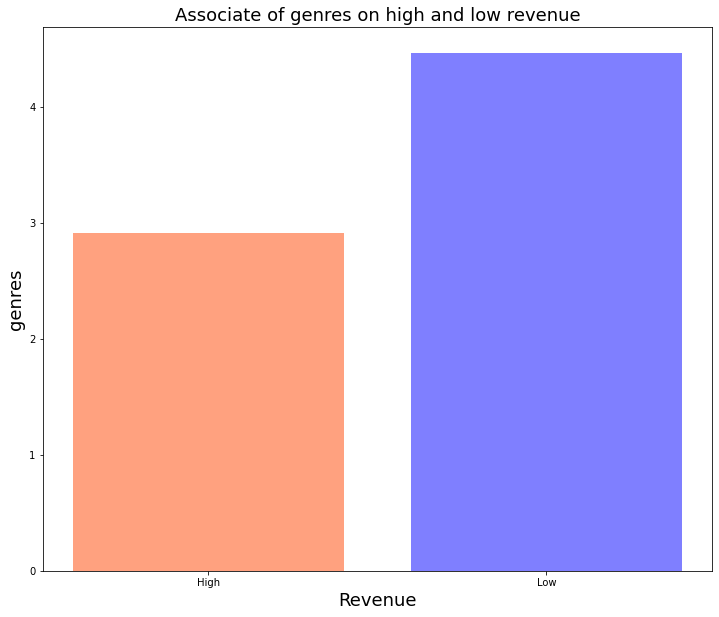

In [699]:
high_revenue_genres_mean,low_revenue_genres_mean =high_revenue['genres'].value_counts().mean(),low_revenue['genres'].value_counts().mean()
plot_revenue(high_revenue_genres_mean,low_revenue_genres_mean,'genres')

#### plot the graph release year of both high revenue and low revenue to see if the release year is associated with high revenue

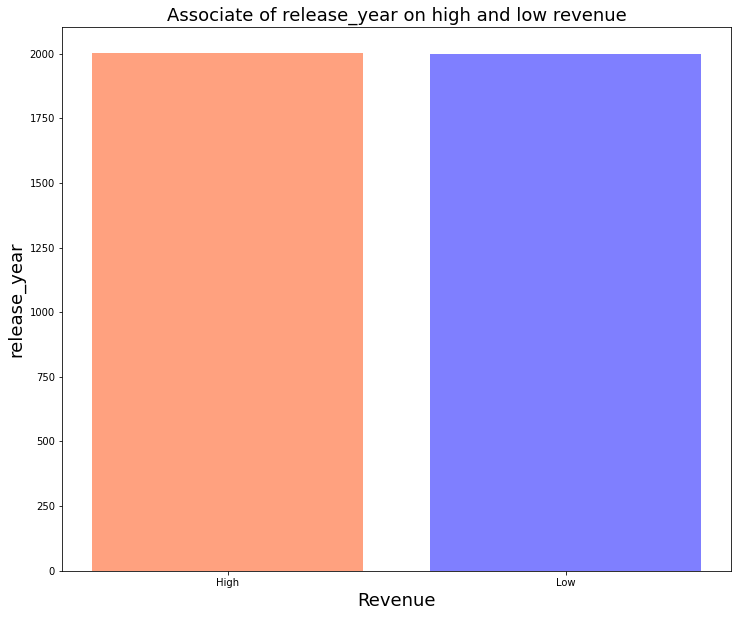

In [700]:
high_revenue_release_year_mean,low_revenue_release_year_mean = revenue_column_mean('release_year')
plot_revenue(high_revenue_release_year_mean,low_revenue_release_year_mean,'release_year')

#### plot the graph director of both high revenue and low revenue to see if the director is associated with high revenue

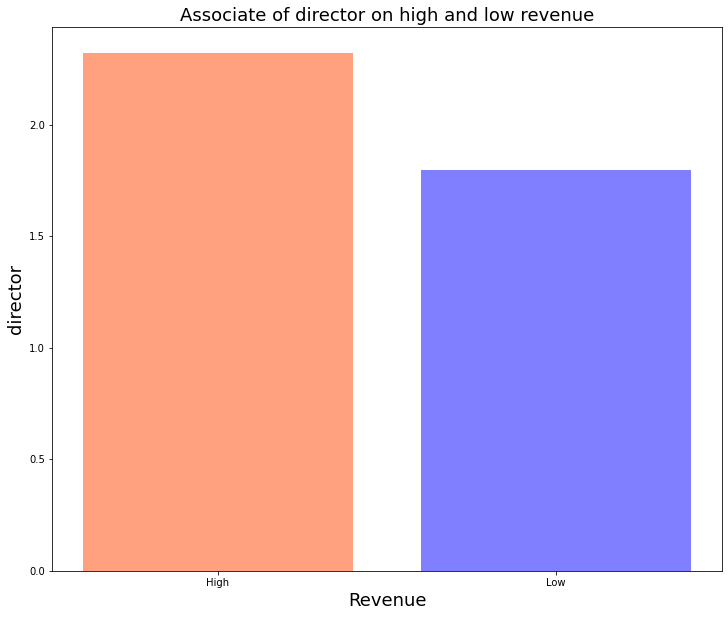

In [701]:
high_revenue_director_mean,low_revenue_director_mean =high_revenue['director'].value_counts().mean(),low_revenue['director'].value_counts().mean()
plot_revenue(high_revenue_director_mean,low_revenue_director_mean,'director')

#### **From all the above graph it is clear that the below column are associated with revenue**
<ul>
<li> popularity</li>
<li>budget</li>
<li> vote_count</li>
<li> runtime</li>
<li> production_companies</li>
<li> director</li>
</ul>


### **Q4 Which year has the highest number of movies release**

In [702]:
pd.DataFrame(df.release_year.describe().reset_index())

,index,release_year
0,count,8691.000000
1,mean,2000.139800
2,std,13.217692
3,min,1960.000000
4,25%,1993.000000
5,50%,2004.000000
6,75%,2011.000000
7,max,2015.000000


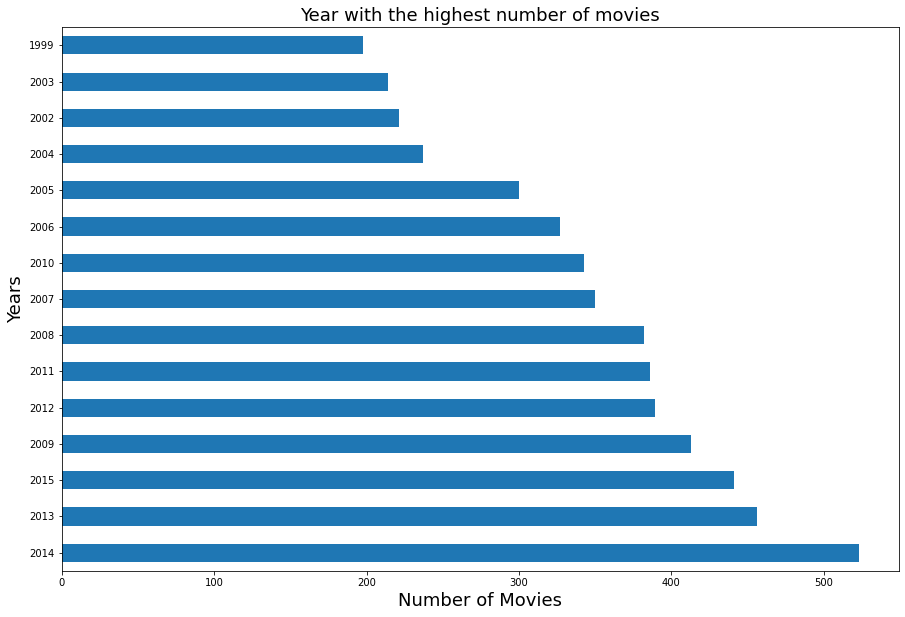

In [703]:
#plot the graph of the total number of movies release for each year 
df.release_year.value_counts().head(15).plot(kind='barh',figsize=(15,10));
plt.title("Year with the highest number of movies",fontsize=18)
plt.xlabel("Number of Movies",fontsize=18)
plt.ylabel("Years",fontsize=18);

In [704]:
#check the value of the highest year from the graph above 
df[df['release_year']==2014].genres.count()

523

#### From the above graph 2014 is the year with the highest number of release (523 movies)


### **Q5 Which production_companies is the most popular**

In [705]:
#statistic of production_companies
pd.DataFrame(df['production_companies'].describe().reset_index())

,index,production_companies
0,count,8691
1,unique,6613
2,top,Paramount Pictures
3,freq,151


In [706]:
#check production_companies column
df['production_companies'].head()

0    Universal Studios|Amblin Entertainment|Legenda...
1    Village Roadshow Pictures|Kennedy Miller Produ...
2    Summit Entertainment|Mandeville Films|Red Wago...
3            Lucasfilm|Truenorth Productions|Bad Robot
4    Universal Pictures|Original Film|Media Rights ...
Name: production_companies, dtype: object

In [707]:
#split the production companies since there is a delimeter "|"
split_production_companies = df['production_companies'].str.get_dummies(sep="|")
#check the split
split_production_companies.head(2)

,"""DIA"" Productions GmbH & Co. KG",# Lexyn Productions,10 West Studios,100 Feet Productions,1019 Entertainment,10th Hole Productions,11:11 Mediaworks,12 Gauge Productions,120dB Films,13 Ghosts Productions Canada Inc.,...,nu image films,platinum studios,the filmgroup,thefyzz,thinkfilm,uFilm,uFund,verture Films,Ã–sterreichischer Rundfunk (ORF),í”„ë¡œë•ì…˜M
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [708]:
#statistic of production_companies
pd.DataFrame(split_production_companies.describe())

,"""DIA"" Productions GmbH & Co. KG",# Lexyn Productions,10 West Studios,100 Feet Productions,1019 Entertainment,10th Hole Productions,11:11 Mediaworks,12 Gauge Productions,120dB Films,13 Ghosts Productions Canada Inc.,...,nu image films,platinum studios,the filmgroup,thefyzz,thinkfilm,uFilm,uFund,verture Films,Ã–sterreichischer Rundfunk (ORF),í”„ë¡œë•ì…˜M
count,8691.000000,8691.000000,8691.000000,8691.000000,8691.000000,8691.000000,8691.000000,8691.000000,8691.000000,8691.000000,...,8691.000000,8691.000000,8691.000000,8691.000000,8691.000000,8691.000000,8691.000000,8691.000000,8691.000000,8691.000000
mean,0.000115,0.000115,0.000115,0.000115,0.000115,0.000345,0.000115,0.000115,0.000575,0.000115,...,0.000230,0.000230,0.000115,0.000115,0.000115,0.000920,0.000115,0.000115,0.000115,0.000115
std,0.010727,0.010727,0.010727,0.010727,0.010727,0.018577,0.010727,0.010727,0.023980,0.010727,...,0.015169,0.015169,0.010727,0.010727,0.010727,0.030327,0.010727,0.010727,0.010727,0.010727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [709]:
#find the sum of all production companies one after the other
split_production_companies.sum().head(2)

"DIA" Productions GmbH & Co. KG    1
# Lexyn Productions                1
dtype: int64

The column is 7068 which is too much to be visualize, the function below we be use to remove columns that have low count

In [710]:
#minimum values used is 200, if there is any column that has count less than 200, it will be dropped
def remove_low_column(dataframe):
    df = dataframe.loc[:, dataframe.sum(axis=0) > 200]
    return df

make use of the above function to remove columns that have max values not more than 10 to reduce the available columns

In [711]:
new_production_companies = remove_low_column(split_production_companies)
new_production_companies.head()

,Columbia Pictures,Metro-Goldwyn-Mayer (MGM),New Line Cinema,Paramount Pictures,Twentieth Century Fox Film Corporation,Universal Pictures,Warner Bros.
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0


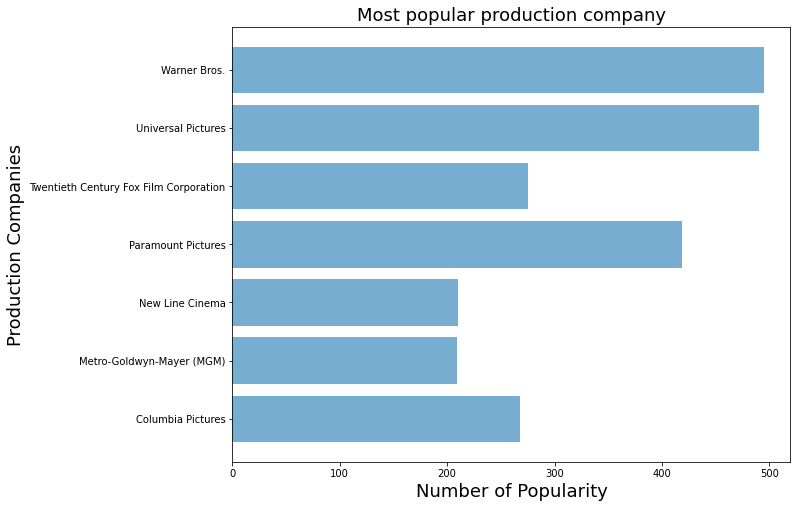

In [712]:
#plot the graph of new_production_companies to check 
plt.figure(figsize=(10,8))
plt.barh(new_production_companies.columns,new_production_companies.sum(),alpha=0.6);
plt.title("Most popular production company",fontsize=18)
plt.xlabel("Number of Popularity",fontsize=18)
plt.ylabel("Production Companies",fontsize=18);


In [713]:
#find the sum of value for Warner Bros. from the graph above
new_production_companies['Warner Bros.'].sum()

495

#### Warner Bros is the most popular production companies base on the number of film produced, it produce 495 movies across the year

### **Q6 What are the longest and shortest movies from year to year**

In [714]:
pd.DataFrame(df['runtime'].describe())

,runtime
count,8691.000000
mean,103.751180
std,26.276793
min,2.000000
25%,91.000000
50%,100.000000
75%,113.000000
max,705.000000


In [715]:
#group column by runtime and original_title
df.groupby('runtime')['original_title'].head()

0                         Jurassic World
1                     Mad Max: Fury Road
2                              Insurgent
3           Star Wars: The Force Awakens
4                              Furious 7
                      ...               
10820    How the Grinch Stole Christmas!
10824     The Bible: In the Beginning...
10835                   The Sand Pebbles
10837                       The Blue Max
10862                         Grand Prix
Name: original_title, Length: 796, dtype: object

In [716]:
pd.DataFrame(df.groupby('runtime')['original_title'].describe())

,count,unique,top,freq
runtime,,,,
2.0,2,2,The Adventures of AndrÃ© and Wally B.,1
3.0,4,4,Batman: Strange Days,1
4.0,9,9,Minions: The Competition,1
5.0,11,11,Riley's First Date?,1
6.0,12,12,Feast,1
...,...,...,...,...
421.0,1,1,The Pillars of the Earth,1
470.0,1,1,Generation Kill,1
500.0,1,1,Life,1


In [717]:
pd.DataFrame(df.groupby('runtime')['original_title'].count().reset_index())

,runtime,original_title
0,2.0,2
1,3.0,4
2,4.0,9
3,5.0,11
4,6.0,12
...,...,...
212,421.0,1
213,470.0,1
214,500.0,1
215,540.0,1


#### **Find the longest movies**

In [718]:
#check longest runtime among all runtime
longest_runtime = df['runtime'].max()
longest_runtime

705.0

In [719]:
#check if there is any runtime that is greater than the max 
df.query(f'runtime > {longest_runtime}')


,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [720]:
#Get the longest movies with the max number of runtime
longest_movies = df.query(f"runtime =={longest_runtime}")["original_title"]
longest_movies

2722    Band of Brothers
Name: original_title, dtype: object

#### Band of Brothers is the longest movies with 705.0 minutes

#### **Find the shortest movies**

In [721]:
pd.DataFrame(df['runtime'].describe())

,runtime
count,8691.000000
mean,103.751180
std,26.276793
min,2.000000
25%,91.000000
50%,100.000000
75%,113.000000
max,705.000000


In [722]:
#check shortest runtime among all runtime
shortest_runtime = df['runtime'].min()
shortest_runtime

2.0

In [723]:
#Get the shortest movies with the max number of runtime
shortest_movie = df.query(f"runtime =={shortest_runtime}")["original_title"]
pd.DataFrame(shortest_movie.describe())

,original_title
count,2
unique,2
top,The Adventures of AndrÃ© and Wally B.
freq,1


In [724]:
#print number of shortest movie
shortest_movie.reset_index()

,index,original_title
0,7905,The Adventures of AndrÃ© and Wally B.
1,10550,Luxo Jr.


#### The shortest movies with 2 minute duration in this dataset are :
#### <ul> 
**<li>The Adventures of AndrÃ© and Wally B. </li>**
**<li>Luxo Jr. </li>**
 
</ul>



##### **Visualizing the shortest and the longest movies**

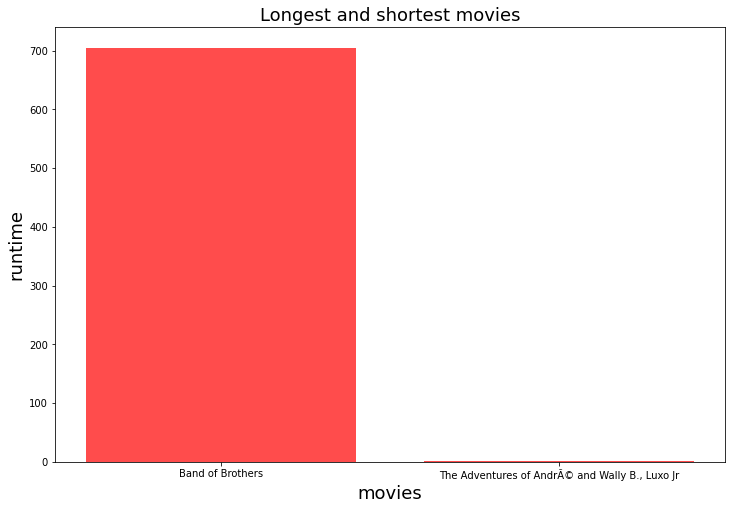

In [725]:
runtime = [longest_runtime,shortest_runtime]
locations = [1,2]
plt.figure(figsize=(12,8))
plt.bar(locations,runtime,color='red',alpha=0.7)
plt.title('Longest and shortest movies',fontsize=18);
plt.xlabel("movies",fontsize=18)
plt.ylabel('runtime',fontsize=18)
plt.xticks([1,2], ["Band of Brothers", "The Adventures of AndrÃ© and Wally B., Luxo Jr"]);

### **Q7 what are the most watch movies base on the runtime?is it the movies with the highest runtime or lowest?**

In [726]:
#statistics analysis of the data
pd.DataFrame(df.groupby('runtime')['popularity'].describe().reset_index())

,runtime,count,mean,std,min,25%,50%,75%,max
0,2.0,2.0,0.476843,0.241007,0.306425,0.391634,0.476843,0.562052,0.647261
1,3.0,4.0,0.355162,0.306773,0.152615,0.190236,0.228467,0.393393,0.811101
2,4.0,9.0,0.539356,0.287112,0.146906,0.378240,0.471351,0.653289,1.125434
3,5.0,11.0,0.464233,0.258126,0.150035,0.343934,0.369792,0.614875,0.905428
4,6.0,12.0,0.309794,0.208602,0.017400,0.163148,0.293305,0.417014,0.705700
...,...,...,...,...,...,...,...,...,...
212,421.0,1.0,0.082894,NaN,0.082894,0.082894,0.082894,0.082894,0.082894
213,470.0,1.0,0.336308,NaN,0.336308,0.336308,0.336308,0.336308,0.336308
214,500.0,1.0,0.102223,NaN,0.102223,0.102223,0.102223,0.102223,0.102223
215,540.0,1.0,0.757082,NaN,0.757082,0.757082,0.757082,0.757082,0.757082


In [727]:
#find the median of the runtime to get the low and the high runtime
runtime_median = df['runtime'].median()
low_runtime = df.query('runtime <=100')
high_runtime = df.query('runtime >100')


In [728]:
#find the mean of each runtime base on popularity
mean_popularity_low = low_runtime['popularity'].mean()
mean_popularity_high = high_runtime['popularity'].mean()

##### **Visualize the most watch movies**

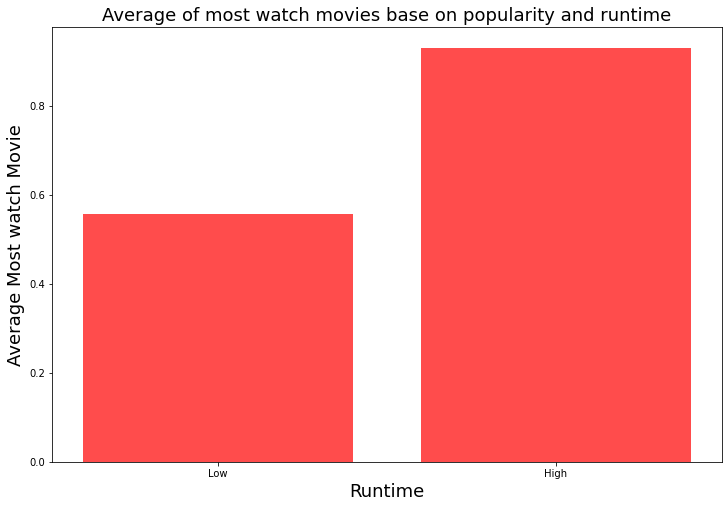

In [729]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_popularity_low, mean_popularity_high]
labels = ['Low', 'High']
plt.figure(figsize=(12,8))
plt.bar(locations, heights, tick_label=labels,color='red',alpha=0.7)
plt.title('Average of most watch movies base on popularity and runtime',fontsize=18)
plt.xlabel('Runtime',fontsize=18)
plt.ylabel('Average Most watch Movie',fontsize=18);

##### From the graph above it clear that video with highest runtime has more popularity , which mean they are the most watched movies

### **Q8 Which director has the highest number of votes?**

In [730]:
# suffle the dataframe by director
director = df.groupby('director')

#get the sum of total number of vote for each director
director_votes = director['vote_count'].sum().nlargest(4) 
pd.DataFrame(director_votes.describe())

,vote_count
count,4.000000
mean,34531.500000
std,6002.791156
min,27883.000000
25%,30817.750000
50%,34265.500000
75%,37979.250000
max,41712.000000


In [731]:
pd.DataFrame(director.describe())

popularity                                          \
                                count      mean       std       min       25%   
director                                                                        
A. Todd Smith                     1.0  1.876037       NaN  1.876037  1.876037   
Aaron Blaise|Robert Walker        1.0  1.653031       NaN  1.653031  1.653031   
Aaron Hann|Mario Miscione         1.0  0.350599       NaN  0.350599  0.350599   
Aaron Harvey                      1.0  1.212003       NaN  1.212003  1.212003   
Aaron Katz|Martha Stephens        1.0  0.267446       NaN  0.267446  0.267446   
...                               ...       ...       ...       ...       ...   
Ãlex de la Iglesia                2.0  0.240290  0.219553  0.085043  0.162667   
Ã–zgÃ¼r Yildirim                  1.0  0.064319       NaN  0.064319  0.064319   
Ã‰mile Gaudreault                 1.0  0.276911       NaN  0.276911  0.276911   
Ã‰tienne Chatiliez                3.0  0.102346  0.080174  0.047949  0.056310   
Ã€lex Pastor|David Pastor         1.0  0.619369       NaN  0.619369  0.619369   

                                                         budget                \
                                 50%       75%       max  count          mean   
director                                                                        
A. Todd Smith               1.876037  1.876037  1.876037    1.0  1.462429e+07   
Aaron Blaise|Robert Walker  1.653031  1.653031  1.653031    1.0  1.000000e+08   
Aaron Hann|Mario Miscione   0.350599  0.350599  0.350599    1.0  1.462429e+07   
Aaron Harvey                1.212003  1.212003  1.212003    1.0  7.000000e+06   
Aaron Katz|Martha Stephens  0.267446  0.267446  0.267446    1.0  1.462429e+07   
...                              ...       ...       ...    ...           ...   
Ãlex de la Iglesia          0.240290  0.317914  0.395538    2.0  1.436214e+07   
Ã–zgÃ¼r Yildirim            0.064319  0.064319  0.064319    1.0  1.462429e+07   
Ã‰mile Gaudreault           0.276911  0.276911  0.276911    1.0  4.361898e+06   
Ã‰tienne Chatiliez          0.064672  0.129545  0.194418    3.0  1.420452e+07   
Ã€lex Pastor|David Pastor   0.619369  0.619369  0.619369    1.0  1.462429e+07   

                            ... vote_average      release_year               \
                            ...          75%  max        count         mean   
director                    ...                                               
A. Todd Smith               ...         5.40  5.4          1.0  2015.000000   
Aaron Blaise|Robert Walker  ...         6.80  6.8          1.0  2003.000000   
Aaron Hann|Mario Miscione   ...         6.10  6.1          1.0  2015.000000   
Aaron Harvey                ...         4.90  4.9          1.0  2011.000000   
Aaron Katz|Martha Stephens  ...         5.80  5.8          1.0  2014.000000   
...                         ...          ...  ...          ...          ...   
Ãlex de la Iglesia          ...         5.75  5.8          2.0  2000.500000   
Ã–zgÃ¼r Yildirim            ...         6.30  6.3          1.0  2008.000000   
Ã‰mile Gaudreault           ...         5.20  5.2          1.0  2003.000000   
Ã‰tienne Chatiliez          ...         7.20  7.2          3.0  1994.666667   
Ã€lex Pastor|David Pastor   ...         5.70  5.7          1.0  2009.000000   

                                                                         \
                                  std     min      25%     50%      75%   
director                                                                  
A. Todd Smith                     NaN  2015.0  2015.00  2015.0  2015.00   
Aaron Blaise|Robert Walker        NaN  2003.0  2003.00  2003.0  2003.00   
Aaron Hann|Mario Miscione         NaN  2015.0  2015.00  2015.0  2015.00   
Aaron Harvey                      NaN  2011.0  2011.00  2011.0  2011.00   
Aaron Katz|Martha Stephens        NaN  2014.0  2014.00  2014.0  2014.00   
...                               ...     ...     

##### *Visualize the director with the highest number of votes*

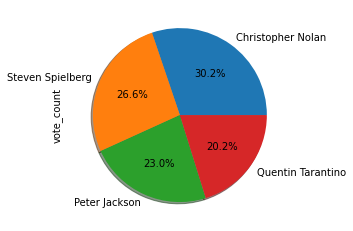

In [732]:
director_votes.plot(kind="pie",autopct='%1.1f%%',shadow=True);

##### Christopher Nolan has the highest number of votes 

<a href="#conclusions"></a>
## **Conclusion**

 <ul>


<li> At the end, I can say the director that direct the movies determine the views and ratings of that particular movies </li>
<li> Genre also plays an important roles because people love to watch Drama more than other genres </li>
<li> People tend to watch movies with more runtime more than short videos </li>
<li> Revenue also play an important role, the higher the revenue the higher the expectation of people for that movie which make it associate with popularity and others </li>

 </ul>

#### **Limitation**
<ul> 
<li>Could not be able to use the correlation between budget and revenue to find the movies with highest profit </li>
<li>Unable to use the cast to find the most popular actor  </li>
</ul>